#### Stock prices


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
#!pip install yfinance
#!pip install bs4
#!pip install nbformat

In [25]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

 - In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Define Graphing Function
 - In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. 
 - It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

 - Use the make_graph function that we’ve already defined. 
 - You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard.

Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.

### Question 1: Use yfinance to Extract Stock Data
 - Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. 
 - The stock is Tesla and its ticker symbol is TSLA.

In [6]:
# Create a ticker object
ticker = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [7]:
# Get historical market data
#hist = ticker.history(period="1mo")  # 1 month of data
tesla_data = ticker.history(period="max") 

# Print the historical data
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2024-10-08 00:00:00-04:00  243.559998  246.210007  240.559998  244.500000   
2024-10-09 00:00:00-04:00  243.820007  247.429993  239.509995  241.050003   
2024-10-10 00:00:00-04:00  241.809998  242.789993  232.339996  238.770004   
2024-10-11 00:00:00-04:00  220.130005  223.339996  214.380005  217.800003   
2024-10-14 00:00:00-04:00  220.130005  221.910004  213.740005  219.160004   

 - Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. 
 - Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [8]:
tesla_data_reset=tesla_data.reset_index()
tesla_data_reset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#### Question 2: Use Webscraping to Extract Tesla Revenue Data

 - Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm 
 - Save the text of the response as a variable named html_data.
 - HUSK at fjerne evt. trailing blanks

Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

Step-by-step instructions

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

Click here if you need help locating the table
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).

In [9]:
# Step 1: Get the HTML content from the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Find all tables in the HTML
tables = soup.find_all('table')

# Step 4: Initialize an empty DataFrame with columns "Date" and "Revenue"
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Step 5: Loop through each table and check if it contains "Tesla Quarterly Revenue"
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        # Step 6: Extract rows from the relevant table
        for row in table.find_all('tr')[1:]:  # Skip the header row
            cols = row.find_all('td')
            
            if len(cols) >= 2:
                date = cols[0].text.strip()  # Extract the date
                revenue = cols[1].text.strip()  # Extract the revenue
                
                # Step 7: Clean revenue data by removing "$" and ","
                revenue = revenue.replace('$', '').replace(',', '')
                
                # Create a new DataFrame row with the extracted data
                new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
                
                # Step 8: Concatenate the new row to the existing DataFrame
                tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Output the DataFrame
print(tesla_revenue)


          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

Execute the following line to remove the comma and dollar sign from the Revenue column.

In [10]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.

In [11]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.

In [12]:
print(tesla_revenue.tail(5))

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


#### Question 3: Use yfinance to Extract Stock Data

 - Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. 
 - The stock is GameStop and its ticker symbol is GME.

In [13]:
# Create a ticker object
ticker = yf.Ticker("GME")

 - Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. 
 - Set the period parameter to "max" so we get information for the maximum amount of time.

In [14]:
# Get historical market data
#hist = ticker.history(period="1mo")  # 1 month of data
gme_data = ticker.history(period="max") 
#gme_data

 - Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. 
 - Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [15]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


#### Question 4: Use Webscraping to Extract GME Revenue Data

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. 
 - Save the text of the response as a variable named html_data_2.

In [16]:
# Step 1: Get the HTML content from the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url).text

 - Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

In [18]:
# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

- Using BeautifulSoup or the read_html function extract the table with GameStop Revenue and store it into a dataframe named gme_revenue. 
- The dataframe should have columns Date and Revenue. 
- Make sure the comma and dollar sign is removed from the Revenue column.

In [ ]:
# Step 3: Find all tables in the HTML
tables = soup.find_all('table')

# Step 4: Initialize an empty DataFrame with columns "Date" and "Revenue"
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Step 5: Loop through each table and check if it contains "Tesla Quarterly Revenue"
for table in tables:
    if "GameStop Revenue" in table.text:
        # Step 6: Extract rows from the relevant table
        for row in table.find_all('tr')[1:]:  # Skip the header row
            cols = row.find_all('td')
            
            if len(cols) >= 2:
                date = cols[0].text.strip()  # Extract the date
                revenue = cols[1].text.strip()  # Extract the revenue
                
                # Step 7: Clean revenue data by removing "$" and ","
                revenue = revenue.replace('$', '').replace(',', '')
                
                # Create a new DataFrame row with the extracted data
                new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
                
                # Step 8: Concatenate the new row to the existing DataFrame
                gme_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

In [20]:
# Output the DataFrame
print(gme_revenue.tail(5))

          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-09-30      46
52  2009-06-30      27
53      Source        


#### Question 5: Plot Tesla Stock Graph

 - Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. 
 - Note the graph will only show data upto June 2021.

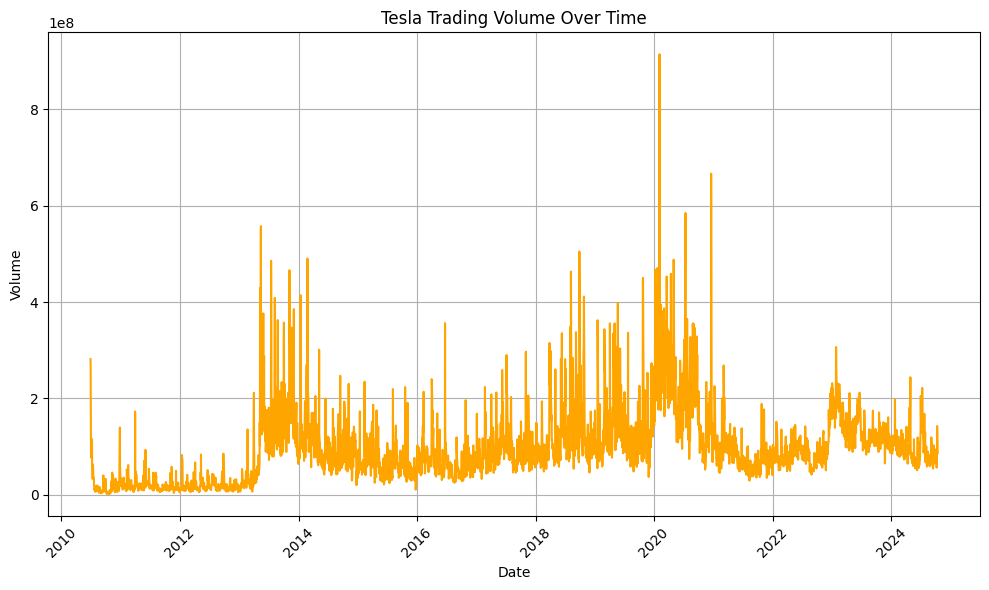

In [26]:
def make_graph(data):
    # Ensure 'Date' is in datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Plot Date vs Volume
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Volume'], label='Volume Traded', color='orange')
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title('Tesla Trading Volume Over Time')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add a grid and show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming tesla_data_reset is a DataFrame with 'Date' and 'Volume' columns
make_graph(tesla_data_reset)


#### Question 6: Plot GameStop Stock Graph
 - Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. 
 - The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). 
 - Note the graph will only show data upto June 2021.

In [36]:
# Convert 'Date' column to datetime format, invalid parsing will be set as NaT
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], errors='coerce')

# Drop rows where 'Date' is NaT (i.e., invalid dates)
gme_revenue_filtered = gme_revenue.dropna(subset=['Date'])

# Now gme_revenue_filtered contains only rows with valid date values
print(gme_revenue_filtered)


         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757
5  2021-06-30   11958
6  2021-03-31   10389
7  2020-12-31   10744
8  2020-09-30    8771
9  2020-06-30    6036
10 2020-03-31    5985
11 2019-12-31    7384
12 2019-09-30    6303
13 2019-06-30    6350
14 2019-03-31    4541
15 2018-12-31    7226
16 2018-09-30    6824
17 2018-06-30    4002
18 2018-03-31    3409
19 2017-12-31    3288
20 2017-09-30    2985
21 2017-06-30    2790
22 2017-03-31    2696
23 2016-12-31    2285
24 2016-09-30    2298
25 2016-06-30    1270
26 2016-03-31    1147
27 2015-12-31    1214
28 2015-09-30     937
29 2015-06-30     955
30 2015-03-31     940
31 2014-12-31     957
32 2014-09-30     852
33 2014-06-30     769
34 2014-03-31     621
35 2013-12-31     615
36 2013-09-30     431
37 2013-06-30     405
38 2013-03-31     562
39 2012-12-31     306
40 2012-09-30      50
41 2012-06-30      27
42 2012-03-31      30
43 2011-12-31      39
44 2011-09

C:\Users\janchri\AppData\Local\Temp\ipykernel_10920\2954039922.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



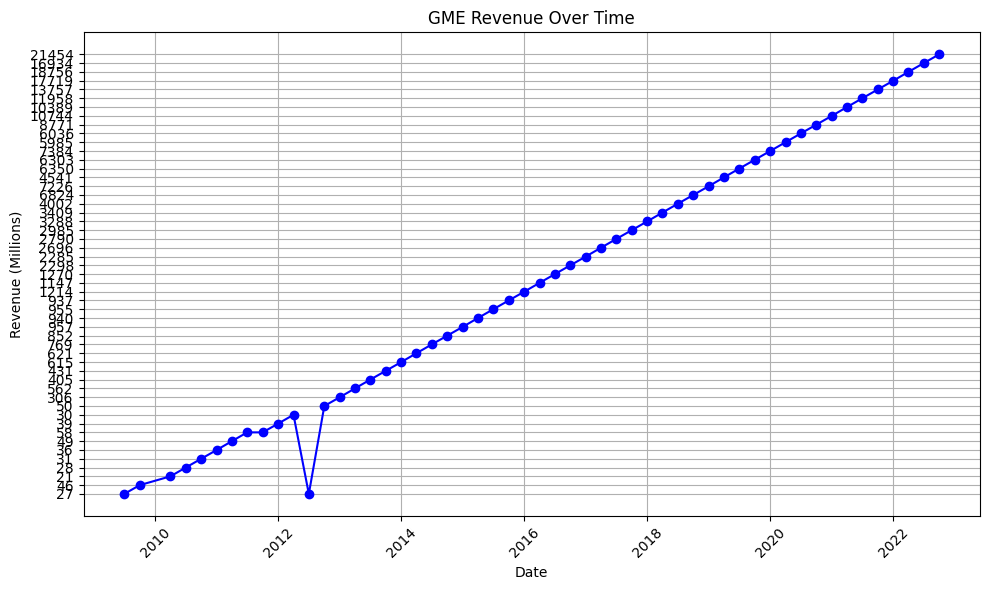

In [37]:
def make_graph(data):
    # Ensure 'Date' is in datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Sort the data by Date in case it isn't already sorted
    data = data.sort_values('Date')

    # Plot Date vs Revenue
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Revenue'], label='Revenue', color='blue', marker='o')
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Revenue (Millions)')
    plt.title('GME Revenue Over Time')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add a grid and show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming gme_revenue is a DataFrame with 'Date' and 'Revenue' columns
make_graph(gme_revenue_filtered)
